# Network Analysis

__Libraries__

In [2]:
# system tools
import os

# data analysis
import pandas as pd
from tqdm import tqdm # the feedback tool so we can see progression when iterating over pandas objects

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

__Read data__

In [3]:
input_file = os.path.join("..", "data", "labelled_data", "fake_or_real_news.csv")

In [4]:
data = pd.read_csv(input_file)

In [5]:
data.sample(10)

,Unnamed: 0,title,text,label
2311,401,Hillary Clinton's first test,“We obviously spoke about my passion and his p...,REAL
1776,9798,Comment on She’s fit to be President! Hillary ...,"February 4, 2016, in Charleston, SC. \nAnd thi...",FAKE
5263,7235,French Jews urged to rally over UNESCO resolut...,"October 28, 2016 French Jews urged to rally ov...",FAKE
5726,5523,A Pimp Just Revealed Trump Also Raped 12-Year-...,Comments \nRepublican nominee Donald Trump is ...,FAKE
5167,25,Planned Parenthood gets over $500 million annu...,Republican legislators have repeatedly tried t...,REAL
5581,6800,Automation: Robots from Korea to America Are R...,,FAKE
670,10061,Manny Pacquiao's Son Dead? Report Says Jimuel ...,Continue Scroll down to preview in browser Man...,FAKE
4313,1468,Dem insiders: Sanders failed to dent Clinton,"Killing Obama administration rules, dismantlin...",REAL
3455,4947,"Stronger together? Yes, Mrs. Clinton, but what...",Hillary Clinton and the Democrats say America ...,REAL
1128,5165,Donald Trump's Problems Are Much Deeper Than A...,Donald Trump's Problems Are Much Deeper Than A...,REAL


Now we want to take only the real news. 

In [6]:
real_df = data[data["label"]=="REAL"]["text"] # whenever the text is real we want to extract the text column

In [7]:
real_df # now we have all of the real news articles

2       U.S. Secretary of State John F. Kerry said Mon...
4       It's primary day in New York and front-runners...
7       A Czech stockbroker who saved more than 650 Je...
8       Hillary Clinton and Donald Trump made some ina...
9       Iranian negotiators reportedly have made a las...
                              ...                        
6324    Most conservatives who oppose marriage equalit...
6327    The freshman senator from Georgia quoted scrip...
6330    The State Department told the Republican Natio...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 3171, dtype: object

## Extract named entities

Now we are going to take the text column and extract named entities from that column. We want to look at the documents individually and not as batches.

In [8]:
# Creating a new list
doc_entities = []

# for every real news 
for post in tqdm(real_df):
    # create a temporary list
    tmp_list = []
    # create spaCy doc object 
    doc = nlp(post)
    # for every named entity in the doc
    for entity in doc.ents: # .ents means that we extract the named entities
        if entity.label_ == "PERSON":
            tmp_list.append(entity.text)
            
    # add tmp_list to main lsit
    doc_entities.append(tmp_list)

100%|██████████| 3171/3171 [08:19<00:00,  6.35it/s]


Now we have a list that contains sublist. Each sublist is the named entities people which appear in a particular document. 

In [13]:
# Taking the first sublist
doc_entities[0]

['John F. Kerry',
 'Laurent Fabius',
 'Francois Hollande',
 'Kerry',
 'Obama',
 'Kerry',
 'Kerry',
 'Benjamin Netanyahu',
 'Jane Hartley',
 'Victoria Nuland',
 'Eric H. Holder Jr.',
 'Narendra Modi',
 'Kerry']

In [14]:
# Looking at the first five sublists
doc_entities[:5]
# Hence, now we have a list of the entities that are named in each document (each documnet is a list)

[['John F. Kerry',
  'Laurent Fabius',
  'Francois Hollande',
  'Kerry',
  'Obama',
  'Kerry',
  'Kerry',
  'Benjamin Netanyahu',
  'Jane Hartley',
  'Victoria Nuland',
  'Eric H. Holder Jr.',
  'Narendra Modi',
  'Kerry'],
 ['Hillary Clinton',
  'Donald Trump',
  'Ted Cruz',
  'Bernie Sanders',
  'D-Vt.',
  'John Kasich',
  'Clinton',
  'Trump',
  'Clinton',
  'Cruz',
  'Cruz',
  'Hillary',
  'Hillary',
  'Hillary',
  'Cruz',
  'Kasich',
  'Clinton'],
 ['Dubbed', 'Nicholas Winton', 'Queen Elizabeth II'],
 ['Hillary Clinton',
  'Donald Trump',
  'Clinton',
  'Trump',
  'Trump',
  'Obama',
  'Trump',
  'Clinton',
  'Clinton',
  'Moammar Gadhafi',
  'Clinton',
  'Clinton',
  'Clinton',
  'Matt Lauer',
  'Clinton',
  'Trump',
  'Howard Stern',
  'Trump',
  'Clinton',
  'Clinton',
  'Clinton',
  'Neil Cavuto',
  'Cavuto',
  'Trump',
  'Chris Matthews',
  'Joe Scarborough',
  'Donald Trump',
  'Obama',
  'George W. Bush',
  'Matt Lauer',
  'Bush',
  'Bush',
  'Condoleezza Rice',
  'Bush',
 

Now we want to create an edgelist showing the edges between these named entities (nodes).

## Create edgelist using ```itertools.combinations()```

In [9]:
from itertools import combinations

In [10]:
# Create an empty edgelist
edgelist = []

# Iterate over every document 
for doc in doc_entities:
    # Create list that pairs the combination in the document
    edges = list(combinations(doc, 2)) # this gives us the possible combinations of pairs (which is why we say 2)
    # For each combination (i.e. each pair of nodes) 
    for edge in edges:
        # Append this to final edgelist
        edgelist.append(tuple(sorted(edge))) # we use sorted() to return the tuples in an ordered way. Because we are working with an undirected network we get duplicates of pairs, and when we use sorted() we order the entries in the tuple to order them in alphabetic order. 

Now we have created one long edgelist of edge pairs. 

In [20]:
len(edgelist)
# About 1.300.000 edges

1290248

In [19]:
# Looking at the first 10 pairs
edgelist[:10]

[('John F. Kerry', 'Laurent Fabius'),
 ('Francois Hollande', 'John F. Kerry'),
 ('John F. Kerry', 'Kerry'),
 ('John F. Kerry', 'Obama'),
 ('John F. Kerry', 'Kerry'),
 ('John F. Kerry', 'Kerry'),
 ('Benjamin Netanyahu', 'John F. Kerry'),
 ('Jane Hartley', 'John F. Kerry'),
 ('John F. Kerry', 'Victoria Nuland'),
 ('Eric H. Holder Jr.', 'John F. Kerry')]

## Counting Edges

Now we want to take the edgelist with over 1 million edges, and we want to use that to create a weighted edegelist using a counter.

In [11]:
# Import counter function. The Counter takes a list and coutns how often each entity appears
from collections import Counter

In [12]:
# Count all edges in edgelist and return the 10 most common edges
Counter(edgelist).most_common(10)

[(('Clinton', 'Clinton'), 67546),
 (('Clinton', 'Hillary Clinton'), 14714),
 (('Bush', 'Bush'), 12244),
 (('Clinton', 'Trump'), 10984),
 (('Cruz', 'Cruz'), 10088),
 (('Clinton', 'Donald Trump'), 8819),
 (('Clinton', 'Hillary'), 6956),
 (('Bernie Sanders', 'Clinton'), 6483),
 (('Bill Clinton', 'Clinton'), 5653),
 (('Clinton', 'Clintons'), 5256)]

Now we want to loop over the edges in the edgelist and create a dataframe. We want to know how often the pairs of nodes appear together which is a measure of "weight" (the strenght of edge between the nodes)

In [13]:
counted_edges = []

# Cor every pair in the edgelist
for pair, weight in Counter(edgelist).items(): # with the .items() we get a simple sequence that Python can iterate over (Python cannot iterate over a dictionary) 
    nodeA = pair[0]
    nodeB = pair[1]
    weight = weight # weight = how frequently any pair of nodes occur. The frequencies are across the entire corpus and not the single document
    counted_edges.append((nodeA, nodeB, weight))

In [26]:
# Looking at the first 20 in the edgelist
counted_edges[:20]
# We can see how often the pairs occur which is the weight 

[('John F. Kerry', 'Laurent Fabius', 2),
 ('Francois Hollande', 'John F. Kerry', 1),
 ('John F. Kerry', 'Kerry', 19),
 ('John F. Kerry', 'Obama', 26),
 ('Benjamin Netanyahu', 'John F. Kerry', 7),
 ('Jane Hartley', 'John F. Kerry', 1),
 ('John F. Kerry', 'Victoria Nuland', 1),
 ('Eric H. Holder Jr.', 'John F. Kerry', 1),
 ('John F. Kerry', 'Narendra Modi', 1),
 ('Francois Hollande', 'Laurent Fabius', 1),
 ('Kerry', 'Laurent Fabius', 9),
 ('Laurent Fabius', 'Obama', 6),
 ('Benjamin Netanyahu', 'Laurent Fabius', 4),
 ('Jane Hartley', 'Laurent Fabius', 1),
 ('Laurent Fabius', 'Victoria Nuland', 1),
 ('Eric H. Holder Jr.', 'Laurent Fabius', 1),
 ('Laurent Fabius', 'Narendra Modi', 1),
 ('Francois Hollande', 'Kerry', 12),
 ('Francois Hollande', 'Obama', 12),
 ('Benjamin Netanyahu', 'Francois Hollande', 3)]

In [27]:
len(counted_edges)
# While the original edgelist was over 1 million, the counted edgelist is only about 300.000 because we have weighted it and taken into account how often the pairs occur

288614

## Create dataframe

In [15]:
edges_df = pd.DataFrame(counted_edges, columns = ["nodeA", "nodeB", "weight"])

In [31]:
edges_df.sample(10)

,nodeA,nodeB,weight
84999,Elizabeth Warren,Hudson,1
26550,Carter,William Kristol,1
236277,Anthony Weiner,Schultz,1
86086,Scott Roeder,Tiller,2
149557,Michelle Obama,Steve Harvey,1
34327,Clinton,Roger Stone,70
17609,Bill Clinton’s,Elizabeth Warren,6
23199,Clinton,Greg Jaffe,38
274091,Bill Weld,John McAfee,1
38565,Joyce Barr,Mount Hermon,1


Now we have a dataframe of the edges and the weight of the edges.
Now we want to filter the dataframe based on how chosen weights. 

In [33]:
filtered_df = edges_df[edges_df["weight"] > 500]

Now we have taken only the edges that occur over 500 times (they have a weight greater than 500). Now we have only 169 pairs. 

## Create Network

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
# To create a network graph (G) we take the edgelist, the nodes and the weight and create a graph
G = nx.from_pandas_edgelist(filtered_df, "nodeA", "nodeB", ["weight"])

In [39]:
# Plot the graph with networkx
pos = nx.nx_agraph.graphviz_layout(G, prog = "neato")
# pos means "position" 

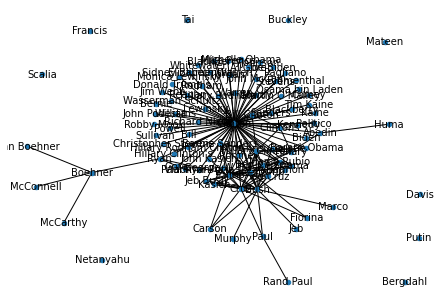

In [40]:
# Draw it with labels
nx.draw(G, pos, with_labels = True, node_size = 20, font_size = 10)

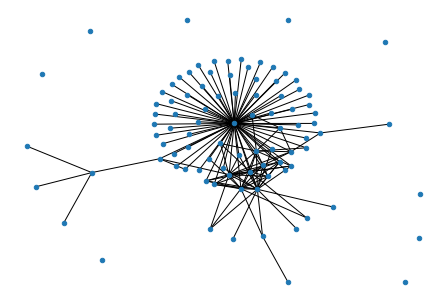

In [42]:
# Draw it without labels
nx.draw(G, pos, with_labels = False, node_size = 20, font_size = 10)

In [55]:
# Save using matplotlib
plt.savefig("network.png", dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

This network visualization demonstrates the problem with visualization of networks - we cannot infer much when we are working with large networks. 

## Calculating centrality measures

In [43]:
# Betweenness centrality
bc_metric = nx.betweenness_centrality(G)

# Eigenvector centrality
ev_metric = nx.eigenvector_centrality(G)

In [44]:
type(bc_metric)

dict

In [45]:
type(ev_metric)

dict

In [46]:
bc_metric

{'Donald Trump': 0.011801242236024845,
 'Hillary Clinton': 0.006564398334584669,
 'Ted Cruz': 3.981525720656155e-05,
 'Bernie Sanders': 0.0,
 'Clinton': 0.7326115395991173,
 'Trump': 0.020877983300343586,
 'Cruz': 0.034759288330716884,
 'Hillary': 0.001475439674197438,
 'Kasich': 0.0,
 'John Kasich': 0.0,
 'Obama': 0.0,
 'Bush': 0.08769367278684047,
 'George W. Bush': 0.0,
 'Reagan': 0.0,
 'Richard Nixon': 0.0,
 'Bill Clinton': 0.0,
 'Bill': 0.0,
 'John McCain': 0.0,
 'Jeb Bush': 0.0,
 'Barack Obama': 0.0,
 'McConnell': 0.0,
 'Joe Biden': 0.0,
 'Elizabeth Warren': 0.0,
 'Paul Ryan': 0.0,
 'Ryan': 0.07566889632107023,
 'Marco Rubio': 0.0,
 'Romney': 0.0,
 'Hillary Rodham Clinton': 0.0,
 'Biden': 0.0,
 'Warren': 0.0,
 'Boehner': 0.058050645007166744,
 'John Boehner': 0.0,
 'Sanders': 0.0,
 "Hillary Clinton's": 0.0,
 "Donald Trump's": 0.0,
 'Mateen': 0.0,
 'Paul': 0.019589106545628284,
 'Rand Paul': 0.0,
 'Stevens': 0.0,
 'Ben Carson': 0.0,
 'Carson': 0.0,
 'Jeb': 0.0,
 'Chris Christie': 

Now we have a dictionary with a centrality measure for each node. We can see the problem with not having coreference resolution, because the objects refering to the same person are not counted as one. 

In [52]:
# Create a dataframe with the node in one column and the centrality score in another column
pd.DataFrame(bc_metric.items(), columns = ["node", "betweenness"]).sort_values("betweenness", ascending = False)

,node,betweenness
4,Clinton,0.732612
11,Bush,0.087694
24,Ryan,0.075669
30,Boehner,0.058051
6,Cruz,0.034759
...,...,...
34,Donald Trump's,0.000000
33,Hillary Clinton's,0.000000
32,Sanders,0.000000
31,John Boehner,0.000000


Clinton has the highest betweenness centrality measure. Again, there is a problem with coreference. 

In [54]:
# Do the same for eigenvector
pd.DataFrame(ev_metric.items(), columns = ["node", "eigenvector"]).sort_values("eigenvector", ascending = False)

,node,eigenvector
4,Clinton,5.396411e-01
11,Bush,2.846430e-01
5,Trump,2.827424e-01
0,Donald Trump,2.629741e-01
6,Cruz,2.522940e-01
...,...,...
53,Scalia,2.649137e-17
73,Davis,2.649137e-17
71,Francis,2.649137e-17
70,Putin,2.649137e-17


When considering eigenvector centrality Trump is suddenly important which he was not with betweenness centrality. 